In [11]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Загрузка данных
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')

# Объединяем все данные
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

# Убираем пропущенные значения
df.dropna(inplace=True)

# Убираем ненужные столбцы
df.drop(['Forward Packets', 'Forward Bytes', 'Reverse Packets', 'Reverse Bytes'], axis=1, inplace=True)

# Преобразуем столбец 'Traffic Type' в категориальные значения
df['Traffic Type'] = df['Traffic Type'].astype('category')

# Определяем признаки и целевую переменную
X = df.drop('Traffic Type', axis=1)
y = df['Traffic Type']

# Разделяем данные на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализируем и обучаем модель
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Оценка модели на тестовых данных
predictions = clf.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predictions) * 100))

# Выводим дополнительные метрики
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(clf.feature_names_in_)

with open('/Users/mikhailkatsuro/Downloads/diplom/DecisionTree.joblib', 'wb') as f:
    pickle.dump(clf, f)


Accuracy: 99.71%
[[228   0   0   1]
 [  0 382   0   0]
 [  0   1 232   0]
 [  1   0   0 204]]
              precision    recall  f1-score   support

         dns       1.00      1.00      1.00       229
        ping       1.00      1.00      1.00       382
      telnet       1.00      1.00      1.00       233
       voice       1.00      1.00      1.00       205

    accuracy                           1.00      1049
   macro avg       1.00      1.00      1.00      1049
weighted avg       1.00      1.00      1.00      1049

['Delta Forward Packets' 'Delta Forward Bytes'
 'Forward Instantaneous Packets per Second'
 'Forward Average Packets per second'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Delta Reverse Packets'
 'Delta Reverse Bytes' 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']


In [10]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Загрузка данных
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')

# Объединяем все данные
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

# Убираем пропущенные значения
df.dropna(inplace=True)

# Оставляем только 4 признака
X = df[['Forward Packets', 'Forward Bytes', 'Reverse Packets', 'Reverse Bytes']]
y = df['Traffic Type']

# Разделяем данные на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализируем и обучаем модель
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Оценка модели на тестовых данных
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions) * 100

print(f'Accuracy: {accuracy:.2f}%')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Сохраняем модель в файл
with open('/Users/mikhailkatsuro/Downloads/diplom/DecisionTree.pkl', 'wb') as f:
    pickle.dump(clf, f)



Accuracy: 99.33%
[[226   2   0   1]
 [  0 381   0   1]
 [  0   2 231   0]
 [  1   0   0 204]]
              precision    recall  f1-score   support

         dns       1.00      0.99      0.99       229
        ping       0.99      1.00      0.99       382
      telnet       1.00      0.99      1.00       233
       voice       0.99      1.00      0.99       205

    accuracy                           0.99      1049
   macro avg       0.99      0.99      0.99      1049
weighted avg       0.99      0.99      0.99      1049



(5243, 17)
(5242, 13)
(5242, 12)
(5242,)
Accuracy: 99.71%
              precision    recall  f1-score   support

         dns       1.00      1.00      1.00       229
        ping       1.00      1.00      1.00       382
      telnet       1.00      1.00      1.00       233
       voice       1.00      1.00      1.00       205

    accuracy                           1.00      1049
   macro avg       1.00      1.00      1.00      1049
weighted avg       1.00      1.00      1.00      1049



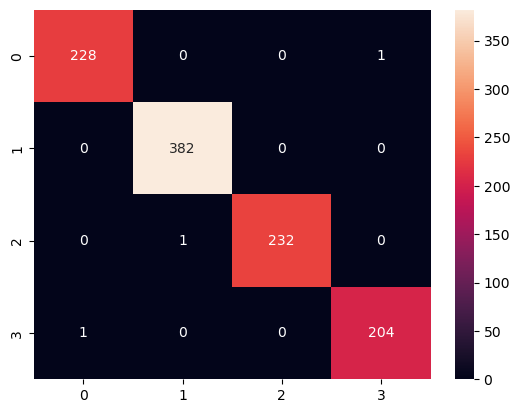

['/Users/mikhailkatsuro/Downloads/diplom/DecisionTree.joblib']

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump

# Загрузка данных
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')
arp_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/formatted_arp_traffic.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)
print(df.shape)
# Предобработка данных
df.dropna(inplace=True)
df.drop(['Forward Packets', 'Forward Bytes', 'Reverse Packets', 'Reverse Bytes'], axis=1, inplace=True)
df['Traffic Type'] = df['Traffic Type'].astype('category')
print(df.shape)
# Разделение данных
X = df.drop('Traffic Type', axis=1)
y = df['Traffic Type']
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Оценка модели
predictions = clf.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(predictions, y_test) * 100))
print(classification_report(y_test, predictions))

# Матрица ошибок
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
plt.show()

# Сохранение модели
dump(clf, '/Users/mikhailkatsuro/Downloads/diplom/DecisionTree.joblib')

In [33]:
pip install scikit-learn==1.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 16.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-1.2.2-cp312-cp312-macosx_11_0_arm64.whl size=8792071 sha256=74c729da727926e364504cf6895d395f3213b1fafff73279e416ad010cf8b4cc
  Stored in directory: /Users/mikhailkatsuro/Library/Caches/pip/wheels/24/f8/77/ae90c181b806f450a6fec8c8f794594e7c92fa79d7ca27e656
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
Note: you may need to restart the kernel to use updated packages.


(7242, 13)
(7242, 12)
(7242,)
Accuracy: 99.79%
              precision    recall  f1-score   support

         arp       1.00      1.00      1.00       382
         dns       0.99      1.00      0.99       233
        ping       1.00      1.00      1.00       377
      telnet       1.00      1.00      1.00       237
       voice       1.00      1.00      1.00       220

    accuracy                           1.00      1449
   macro avg       1.00      1.00      1.00      1449
weighted avg       1.00      1.00      1.00      1449



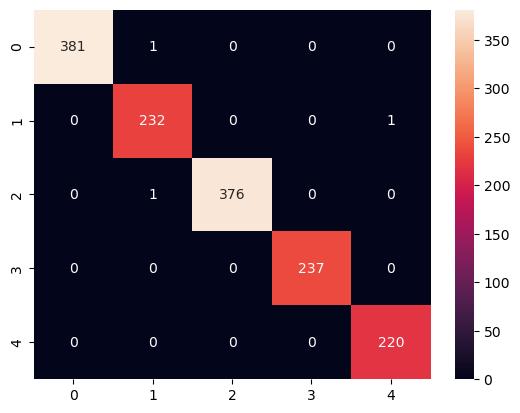

Модель сохранена в формате joblib
Модель сохранена в формате pickle


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
import pickle  # для сохранения в pickle

# Загрузка данных
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')
arp_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/arp_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df, arp_df], ignore_index=True)

# Предобработка данных
df.dropna(inplace=True)
df.drop(['Forward Packets', 'Forward Bytes', 'Reverse Packets', 'Reverse Bytes'], axis=1, inplace=True)
df['Traffic Type'] = df['Traffic Type'].astype('category')
print(df.shape)

# Разделение данных
X = df.drop('Traffic Type', axis=1)
y = df['Traffic Type']
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Оценка модели
predictions = clf.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(predictions, y_test) * 100))
print(classification_report(y_test, predictions))

# Матрица ошибок
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
plt.show()

# Сохранение модели в формате joblib
dump(clf, '/Users/mikhailkatsuro/Downloads/diplom/DecisionTree.joblib')
print("Модель сохранена в формате joblib")

# Сохранение модели в формате pickle
with open('/Users/mikhailkatsuro/Downloads/diplom/DecisionTree.pkl', 'wb') as f:
    pickle.dump(clf, f)
print("Модель сохранена в формате pickle")


(5242, 13)
For this sample, our model predicted voice and it was actually voice
Accuracy: 98.93%
4.0
[[570   0   0   3]
 [  0 885  14   1]
 [  0   8 569   0]
 [  1   0   1 569]]
          Predicted 0  Predicted 1  Predicted 2  Predicted 3
Actual 0          570            0            0            3
Actual 1            0          885           14            1
Actual 2            0            8          569            0
Actual 3            1            0            1          569


/Users/mikhailkatsuro/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mikhailkatsuro/anaconda3/lib/python3.12/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


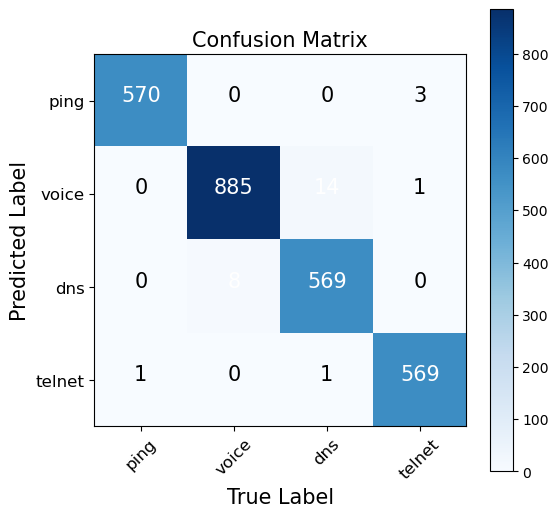

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Импортируем LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
import pickle  # для сохранения в pickle

# Загрузка данных
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')
arp_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/arp_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

# Предобработка данных
df.dropna(inplace=True)
df.drop(['Forward Packets', 'Forward Bytes', 'Reverse Packets', 'Reverse Bytes'], axis=1, inplace=True)
df['Traffic Type'] = df['Traffic Type'].astype('category')
print(df.shape)

X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=101)
model = LogisticRegression()
model.fit(X_train,y_train)
idx = 2590 #random number
single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_test = df.iloc[idx]['Traffic Type']
single_prediction = model.predict(single_x_test)
print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_test))

predictions = model.predict(X_test)
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))
print(pickle.format_version)
pickle.dump(model,open('/Users/mikhailkatsuro/Downloads/diplom/LogisticRegression','wb'))

cm = confusion_matrix(predictions,y_test, labels=y.cat.categories)
print(cm)

import pandas as pd
from numpy.random import randint
y_true = pd.Series(['ping','voice', 'dns', 'telnet'])
y_pred = pd.Series(['ping','voice', 'dns', 'telnet'])
num_classes = len(set(y_true))
indices = [f'Actual {i}' for i in range(num_classes)]
columns = [f'Predicted {i}' for i in range(num_classes)]
cm_df = pd.DataFrame(cm,index=indices, columns=columns)
print(cm_df)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
plt.show()



(7242, 13)
For this sample, our model predicted voice and it was actually voice
Accuracy: 99.17%
[[970   0   1   1   1]
 [  0 552   0   0   2]
 [  0  24 912   0   0]
 [  0   1   0 601   0]
 [  0   0   0   0 556]]
          Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4
Actual 0          970            0            1            1            1
Actual 1            0          552            0            0            2
Actual 2            0           24          912            0            0
Actual 3            0            1            0          601            0
Actual 4            0            0            0            0          556


/Users/mikhailkatsuro/anaconda3/lib/python3.12/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


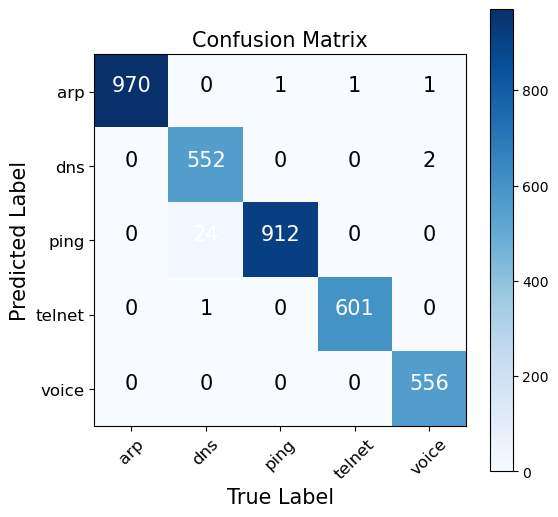

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler  # Импортируем StandardScaler для нормализации
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
import pickle  # для сохранения в pickle

# Загрузка данных
ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')
arp_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/arp_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df, arp_df], ignore_index=True)

# Предобработка данных
df.dropna(inplace=True)
df.drop(['Forward Packets', 'Forward Bytes', 'Reverse Packets', 'Reverse Bytes'], axis=1, inplace=True)
df['Traffic Type'] = df['Traffic Type'].astype('category')
print(df.shape)

X = df.drop('Traffic Type', axis=1)
y = df['Traffic Type']

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=101)

# Создание и обучение модели
model = LogisticRegression(max_iter=200)  # Увеличиваем количество итераций
model.fit(X_train, y_train)

# Прогнозирование для одного примера
idx = 2590  # random index
single_x_test = [df.iloc[idx].drop('Traffic Type').values]
single_x_test_scaled = scaler.transform(single_x_test)  # Применяем масштабирование для теста
single_y_test = df.iloc[idx]['Traffic Type']
single_prediction = model.predict(single_x_test_scaled)
print(f'For this sample, our model predicted {single_prediction[0]} and it was actually {single_y_test}')

# Прогнозирование на тестовой выборке
predictions = model.predict(X_test)

# Вывод результатов
resultsDF = pd.DataFrame({
    'true': y_test,
    'predicted': predictions
})
resultsDF.head()

# Оценка точности
print(f'Accuracy: {accuracy_score(predictions, y_test) * 100:.2f}%')

# Сохранение модели
pickle.dump(model, open('/Users/mikhailkatsuro/Downloads/diplom/LogisticRegression', 'wb'))

# Матрица ошибок
cm = confusion_matrix(predictions, y_test, labels=y.cat.categories)
print(cm)

# Печать матрицы ошибок в DataFrame
cm_df = pd.DataFrame(cm, index=[f'Actual {i}' for i in range(len(y.cat.categories))], 
                     columns=[f'Predicted {i}' for i in range(len(y.cat.categories))])
print(cm_df)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.cat.categories))
plt.xticks(tick_marks, y.cat.categories, rotation=45, fontsize=12)
plt.yticks(tick_marks, y.cat.categories, fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

# Подпись чисел в ячейках матрицы
for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), horizontalalignment='center', color=color, fontsize=15)

plt.show()


(6474, 13)
Features: ['Delta Forward Packets' 'Delta Forward Bytes'
 'Forward Instantaneous Packets per Second'
 'Forward Average Packets per second'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Delta Reverse Packets'
 'Delta Reverse Bytes' 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']
Value counts:
For this sample, our model predicted voice and it was actually voice
Accuracy: 99.38%
4.0
[[606   0   1   2   0]
 [  0 578   0   1   0]
 [  0   0 893  12   1]
 [  0   0   2 574   0]
 [  0   1   0   0 566]]
          Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4
Actual 0          606            0            1            2            0
Actual 1            0          578            0            1            0
Actual 2            0            0          893           12            1
Actual 3            0            0          

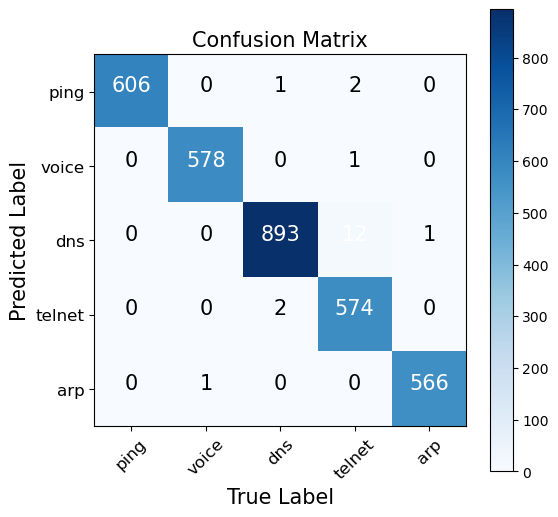

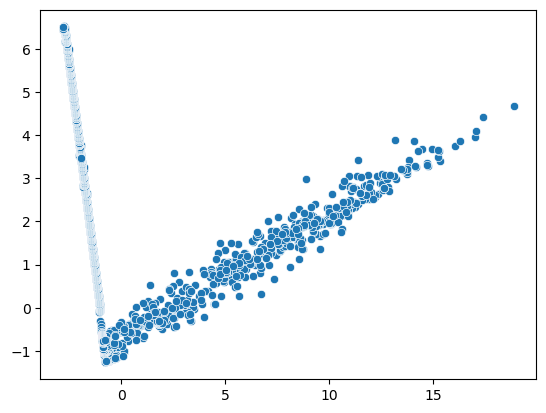

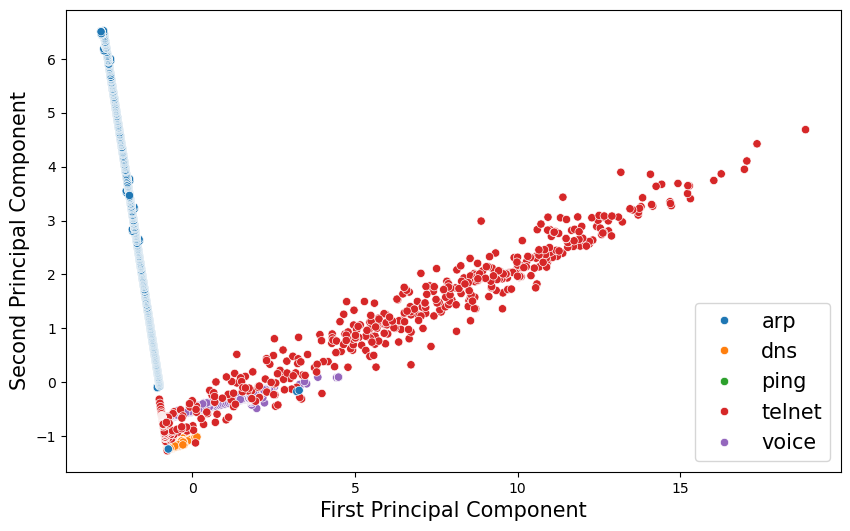

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler  # Импортируем StandardScaler для нормализации
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
import pickle  # для сохранения в pickle
import pandas as pd
from numpy.random import randint


ping_df = pd.read_csv('ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('telnet_training_data.csv', delimiter='\t')
arp_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/arp_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df, arp_df], ignore_index=True)

df.dropna(inplace=True)

df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)

print(df.shape)
df.describe()

df['Traffic Type'] = df['Traffic Type'].astype('category')
df['Traffic Type'].cat.categories
df['Traffic Type'].cat.codes.head()

print('Features:',df.columns[:-1].values)
print ('Value counts:')

df['Traffic Type'].value_counts()

X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=101)

model = LogisticRegression()
model.fit(X_train,y_train)
idx = 2590 #random number
single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_test = df.iloc[idx]['Traffic Type']

single_prediction = model.predict(single_x_test)
print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_test))

predictions = model.predict(X_test)

resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()

print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

print(pickle.format_version)
pickle.dump(model,open('/Users/mikhailkatsuro/Downloads/diplom/LogisticRegression33','wb'))
cm = confusion_matrix(predictions,y_test, labels=y.cat.categories)
print(cm)

y_true = pd.Series(['ping','voice', 'dns', 'telnet', 'arp'])
y_pred = pd.Series(['ping','voice', 'dns', 'telnet', 'arp'])

num_classes = len(set(y_true))
indices = [f'Actual {i}' for i in range(num_classes)]
columns = [f'Predicted {i}' for i in range(num_classes)]
cm_df = pd.DataFrame(cm,index=indices, columns=columns)
print(cm_df)

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
plt.show()

(6474, 13)
Features: ['Delta Forward Packets' 'Delta Forward Bytes'
 'Forward Instantaneous Packets per Second'
 'Forward Average Packets per second'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Delta Reverse Packets'
 'Delta Reverse Bytes' 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']
Value counts:
For this sample, our model predicted voice and it was actually voice
Accuracy: 99.38%
4.0
[[606   0   1   2   0]
 [  0 578   0   1   0]
 [  0   0 893  12   1]
 [  0   0   2 574   0]
 [  0   1   0   0 566]]
          Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4
Actual 0          606            0            1            2            0
Actual 1            0          578            0            1            0
Actual 2            0            0          893           12            1
Actual 3            0            0          

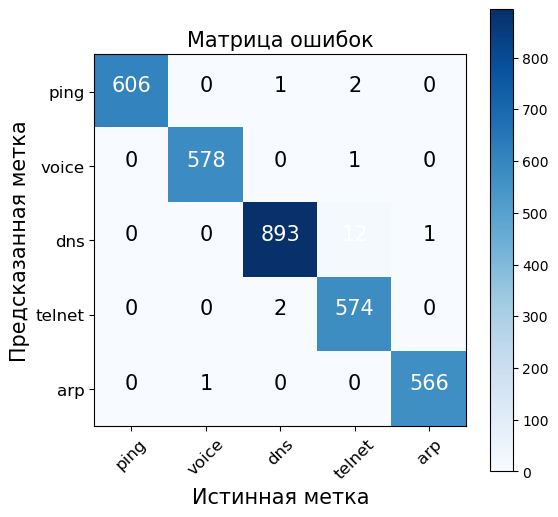

In [12]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Show plots inline
%matplotlib inline


ping_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/voice_training_data33.csv', delimiter='\t')
dns_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/telnet_training_data.csv', delimiter='\t')
arp_df = pd.read_csv('/Users/mikhailkatsuro/Downloads/diplom/arp_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df, arp_df], ignore_index=True)

df.dropna(inplace=True)

df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)

print(df.shape)
df.describe()

df['Traffic Type'] = df['Traffic Type'].astype('category')
df['Traffic Type'].cat.categories
df['Traffic Type'].cat.codes.head()

print('Features:',df.columns[:-1].values)


print ('Value counts:')
df['Traffic Type'].value_counts()

X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=101)

model = LogisticRegression()
model.fit(X_train,y_train)
idx = 2590 #random number
single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_test = df.iloc[idx]['Traffic Type']

single_prediction = model.predict(single_x_test)
print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_test))

predictions = model.predict(X_test)

resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()

print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

print(pickle.format_version)
pickle.dump(model,open('/Users/mikhailkatsuro/Downloads/diplom/LogisticRegression33','wb'))
cm = confusion_matrix(predictions,y_test, labels=y.cat.categories)
print(cm)

y_true = pd.Series(['ping','voice', 'dns', 'telnet', 'arp'])
y_pred = pd.Series(['ping','voice', 'dns', 'telnet', 'arp'])

num_classes = len(set(y_true))
indices = [f'Actual {i}' for i in range(num_classes)]
columns = [f'Predicted {i}' for i in range(num_classes)]
cm_df = pd.DataFrame(cm,index=indices, columns=columns)
print(cm_df)

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Матрица ошибок', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('Истинная метка', fontsize=15)
plt.ylabel('Предсказанная метка', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
plt.show()


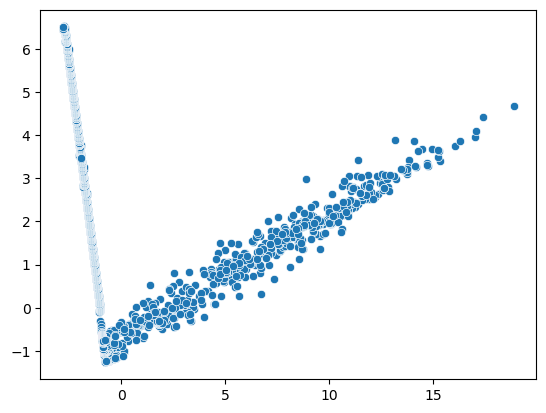

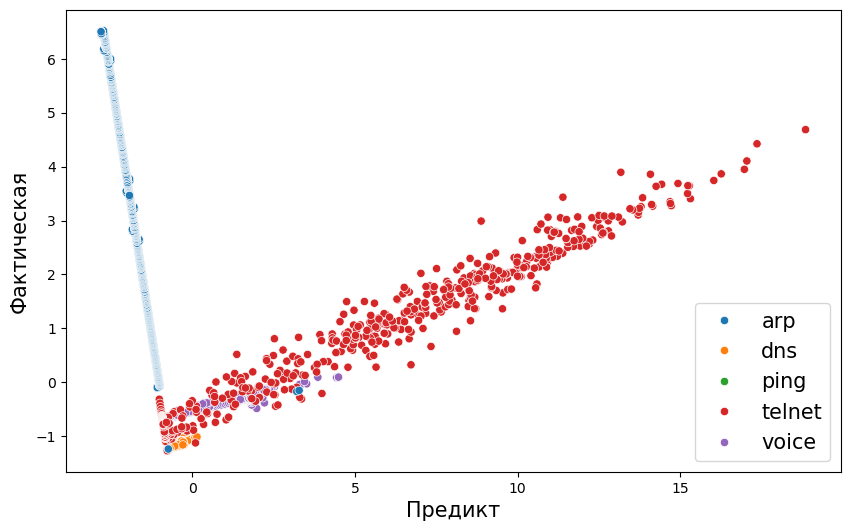

In [16]:
scaler = StandardScaler()
scaler.fit(df.drop('Traffic Type',axis=1))
scaled_data = scaler.transform(df.drop('Traffic Type',axis=1))
scaled_data[0:5]
scaled_data.mean(axis=0)
scaled_data.std(axis=0)
pca = PCA(n_components=2)
pca.fit(scaled_data)
scaled_data.shape

x_pca = pca.transform(scaled_data)
x_pca.shape
pca.explained_variance_ratio_
pca.explained_variance_ratio_.sum()*100
import seaborn as sns
import matplotlib.pyplot as plt
# Correct usage of scatterplot
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], data=df)
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=df['Traffic Type'])
plt.xlabel('Предикт', fontsize=15)
plt.ylabel('Фактическая', fontsize=15)
plt.legend(title="Тип трафика", fontsize=15)
plt.legend(fontsize=15)
plt.show()